chapter_2 Supervised Learning
-----------

## 2.1 분류와 회귀

#### classification
- 분류
  - 이진 분류 : binary classification
  - 다중 분류 : multiclass classification


#### regression
- 회귀
  - 연속적인 숫자 또는 프로그래밍 용어로 말하면 부동소수점수를 예측하는 것
  - 교육 수준, 나이, 주거지를 바탕으로 연간 소득을 예측하는 것이 회귀의 하나의 예
  - 수확량 예측 등등

### 2.2 Generalization, overfitting, underfitting

#### Generalization
- 일반화
- 모델이 처음 보는 데이터에 대해 정확하게 예측 할 수 있으면 이를 훈련 세트에서 테스트 세트로 일반화 되었다고 함
- 그래서 모델을 만들 때는 가능한 정확하게 일반화 되도록 해야 함

#### overfitting
- 과대적합
- 가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것
- 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때 발생함
- 한 마디로 훈련 세트에만 최적화 된 모델을 생성

#### underfitting
- 과소 적합
- 너무 간단한 모델이 선택 되는 것


sweet spot을 어떻게 찾을 것인가?

![alt text](https://github.com/amueller/introduction_to_ml_with_python/raw/62a9b3fb553650b0bab0f6a738da033be6e5af55/images/overfitting_underfitting_cartoon.png)

### 2.2.1 모델 복잡도와 데이터셋 크기의 관계

> 모델의 복잡도는 훈련 데이터셋에 담긴 입력 데이터의 다양성과 관련

> 데이터셋에 다양한 데이터 포인트가 많을 수록 과대적합 없이 더 복잡한 모델을 만들 수 있다.

> 그러나 같은 데이터 포인트를 중복하거나 매우 비슷한 데이터를 모으는 것은 도움이 되지 않는다.

> 데이터양의 힘을 과소 평가하지 말고 열심히 모으자.

### 2.3 지도 학습 알고리즘

### 2.3.1 예제용 데이터셋

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import matplotlib
from matplotlib import font_manager, rc
apple = font_manager.FontProperties(fname = '/Library/Fonts/AppleGothic.ttf').get_name()
rc('font', family = apple)
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


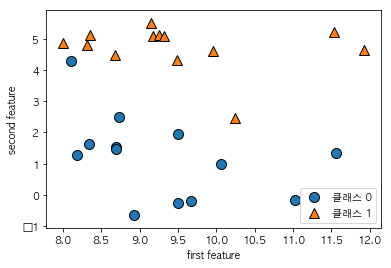

In [6]:
# make binary dataset using mglearn

X, y = mglearn.datasets.make_forge()

# draw scatter plot
mglearn.discrete_scatter(X[:, 0], X[:, 1:], y)
plt.legend(['클래스 0', '클래스 1'], loc=4)
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.show()

In [7]:
print(X.shape)

(26, 2)


--------

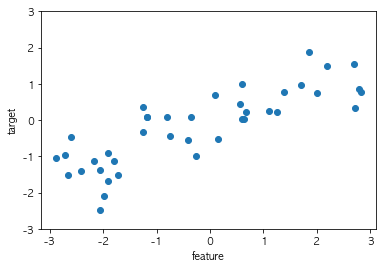

In [52]:
# make dataset for regression

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('feature')
plt.ylabel('target')
plt.show()

#### 위스콘신 유방암 데이터

In [13]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [16]:
print(cancer['data'].shape)

(569, 30)


In [18]:
# benign : 양성, malignant : 악성

print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


In [19]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [20]:
# dataset for regression


from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:", boston.data.shape)

Data shape: (506, 13)


In [22]:
# completed feature engineering dataset
# feature engineering을 이용해서 13개에서 104개로 늘림

X, y = mglearn.datasets.load_extended_boston()
print(X.shape)

(506, 104)


### 2.3.2 KNN

#### KNN?
- K-Nearset Neighbors
- 새로운 데이터 포인트에 대해 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트, **최근접 이웃**을 찾음

#### KNN classification

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


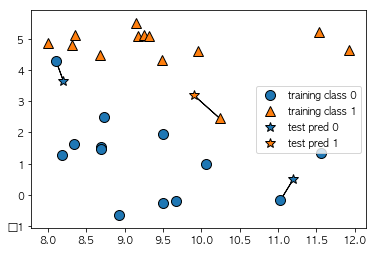

In [25]:
# 1개로 정할 때

mglearn.plots.plot_knn_classification(n_neighbors=1)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


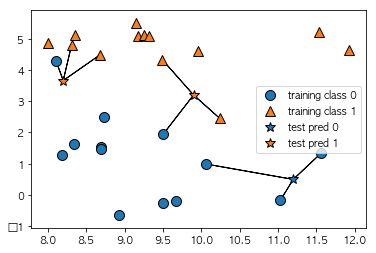

In [27]:
# 이웃하는 점의 개수를 3개로 정할 때

mglearn.plots.plot_knn_classification(n_neighbors=3)

In [28]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [29]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [30]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [31]:
print(clf.predict(X_test))

[1 0 1 0 1 0 0]


In [32]:
clf.score?

Signature: clf.score(X, y, sample_weight=None)
Docstring:
Returns the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy
which is a harsh metric since you require for each sample that
each label set be correctly predicted.

Parameters
----------
X : array-like, shape = (n_samples, n_features)
    Test samples.

y : array-like, shape = (n_samples) or (n_samples, n_outputs)
    True labels for X.

sample_weight : array-like, shape = [n_samples], optional
    Sample weights.

Returns
-------
score : float
    Mean accuracy of self.predict(X) wrt. y.
File:      /anaconda3/lib/python3.7/site-packages/sklearn/base.py
Type:      method


In [33]:
clf.score(X_test, y_test)

0.8571428571428571

#### KNN-classifier 분석

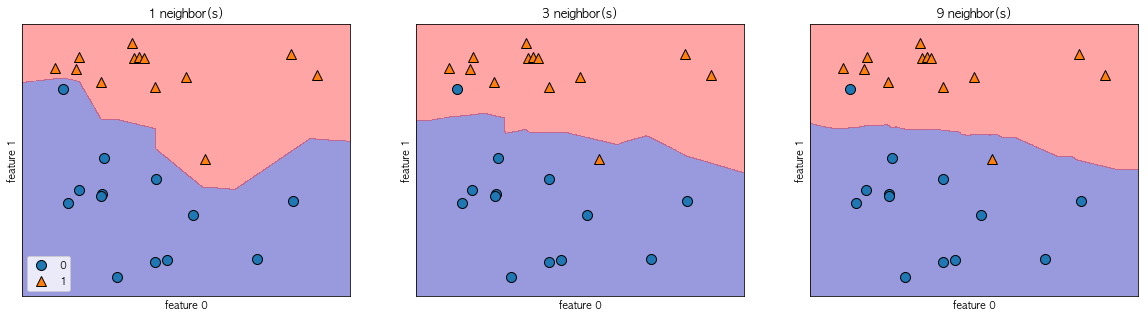

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)


decision boundary : 결정 경계
- n_neighbor = 1일 때는 decision boundary 가 훈련 데이터에 가깝게 따라감
- 숫자를 늘릴 수록 경계가 부드러워짐
- n_neighbor 적게 사용할 수록 모델의 복잡도가 높아지고, 많이 사용할 수록 복잡도는 낮아짐

#### complexity vs generalization with model

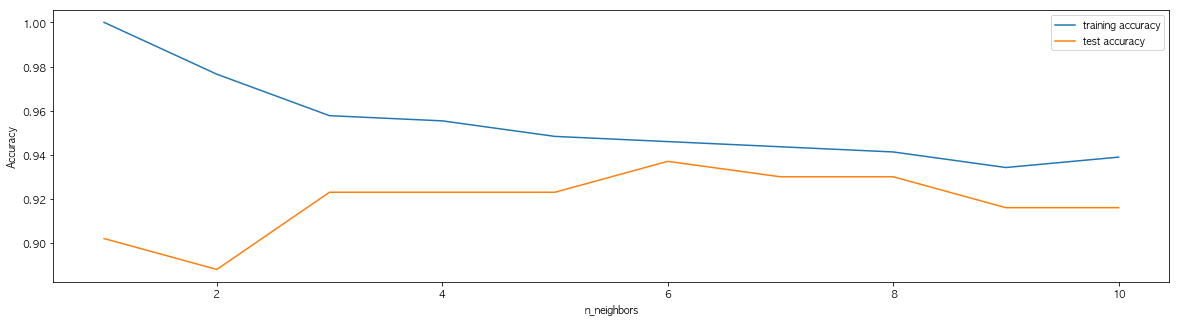

In [40]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.figure(figsize = (20, 5))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

n_neighbors가 하나 일 때
- training accuracy가 완벽, 그러나 n_neighbors가 늘어나면 떨어진다.
- test accuracy가는 낮음, 그러나 n_neighbors가 늘어나면 변화가 있다.
- 적은 경우는 모델을 너무 복잡하게 만든 다는 것, 반대로 많을 경우 모델이 너무 단순해서 정확도가 나빠짐
- 이 경우에 한해서 가장 좋을 때는 6개를 사용 할 때임

#### KNN regression

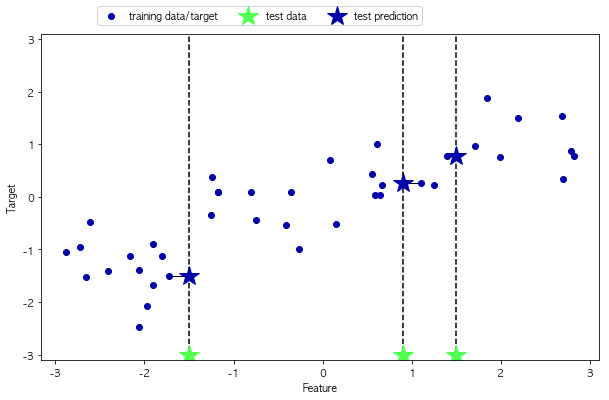

In [53]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

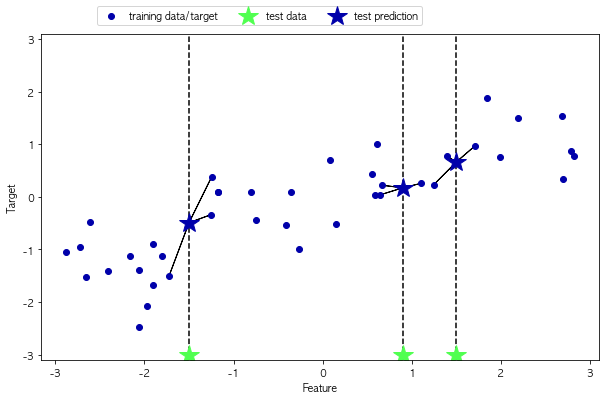

In [54]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [44]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)

# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [45]:
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [46]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


#### R^2?

- [결정계수에 대한 직관 기르기](https://ko.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/assessing-the-fit-in-least-squares-regression/a/r-squared-intuition)
- 결정 계수
  - 회귀 모델에서 예측의 적합도를 측정한 것
  - 보통 0~1사이의 값이 됨
  - 1은 예측이 완벽한 경우, 0은 훈련 세트의 출력값인 y_train의 평균으로만 예측하는 모델의 경우
  - 음수가 될 수도 있음, 이 때는 타깃이 상반된 경향을 가지는 경우에 한함

$$
1\quad -\quad \frac { \sum { { (y-y) }^{ 2 } }  }{ \sum { { (y-\hat { y } ) }^{ 2 } }  } 
$$

#### KNN regression 분석

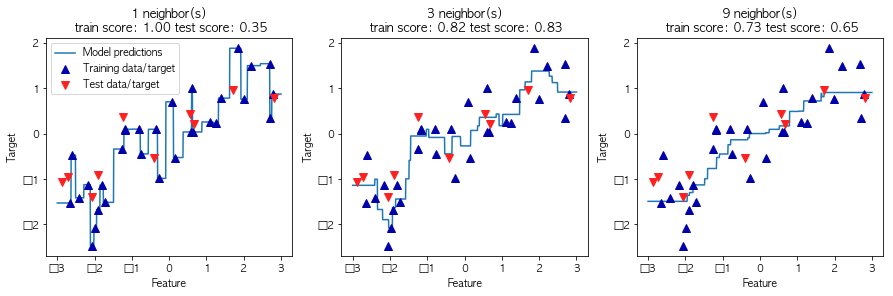

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

#### 장단점과 매개변수

매개변수
- 중요한 것은 두 개
  - 데이터 포인트 사이의 거리를 재는 방법 : 유클리디안 distance를 사용 : https://ko.wikipedia.org/wiki/%EC%9C%A0%ED%81%B4%EB%A6%AC%EB%93%9C_%EA%B1%B0%EB%A6%AC
    - 쉽게 말하면 두 점 사이의 거리를 재는 공식 생각하면 됩니다.
    - feature 마다 값의 범위가 다르면 범위가 작은 특성에 크게 영향을 받음, 결론적으로 scaling을 잘해야 함
  - 이웃의 수 : 잘 설정해야 함
  
  
장점
- 이해하기 쉬운 모델
- parameter 조정이 적어도 좋은 성능 얻을 수 있음
- 복잡한 알고리즘 적용 전에 시도해 볼 수 있는 시작 방법임


단점
- train set이 매우 크면(feature, sample 등이 크면) 예측이 느려짐
- 데이터 전처리가 무척 중요함
- feature가 수백 개 이상이 될 경우에는 잘 동작하지 않음
- 특성 값이 대부분 0인 (즉, 희소한...sparse) 데이터셋에서는 특히 잘 작동하지 않음

현업에서는 잘 안 쓰임

### 2.3.3 선형 모델

#### 회귀의 선형 모델

$$
\hat { y } =w[0]\quad +\quad x[0]\quad +\quad w[1]\quad \times \quad x[1]\quad +\quad \cdot \cdot \cdot \quad +\quad w[p]\quad \times x[p]\quad +\quad b
$$


- w와 b는 모델이 학습할 파라미터
- y hat은 모델이 만들어낸 예측값
- feature가 하나인 데이터셋은 아래와 같이 표현할 수 있다.

$$
\hat { y } =w[0]\times x[0]+b
$$

w[0]: 0.393906  b: -0.031804


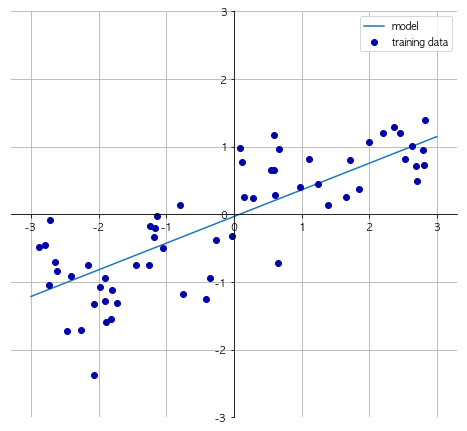

In [55]:
mglearn.plots.plot_linear_regression_wave()

#### OLS - ordinary least squares
- 한국어로 하면 최소제곱법
- 가장 간단하고 오래된 회귀용 선형 알고리즘
- MSE를 최소화 하는 파라미터 w와 b를 찾음
- w : 가중치,  weight, coefficient
- b : coffeset(편향), intercept(절편)


**mean squared error**
- 평균제곱오차
- 예측한 값과 타겟값의 차이를 제곱하여 더한 후 샘플의 개수로 나눈 방법
$$
MSE\quad =\quad \frac { 1 }{ n } \sum _{ i=1 }^{ n }{ { ({ y }_{ i }-{ \hat { y }  }_{ i }) }^{ 2 } } 
$$


선형 회귀는 parameter가 없는 것이 장점이지만, 모델의 복잡도를 제어할 방법도 없다.

In [56]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [57]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [58]:
# boston house dataset

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


**Notice**

- 성능 차이는 모델이 과대적합되었다는 결론이므로, 복잡도를 제어할 수 있는 모델을 사용해야 함
- 기존 방식 대비 널리 쓰이는 모델은 **Ridge**

#### Ridge
- 회귀를 위한 선형 모델
- 리지에서의 가중치(w) 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라, 추가 제약 조건을 만족시키기 위한 목적도 존재
- 가중치의 절댓값을 가능한 한 작게 만드는 것이 목표
  - **다시 말해 w의 모든 원소가 0에 가깝게 되길 원함**
- **직관적으로 생각하면 모든 특성이 출력에 주는 영향을 최소한으로 만드는 것 = 기울기를 작게 만듬**

**Regularization**
- overfitting이 되지 않도록 강제로 제한을 하는 것을 Regularization(규제) 라고 한다.
- Ridge 는 L2라고도 함
- 수식 설명
  - α 값을 크게 하면 패널티의 효과가 커지고(가중치 감소), α 값을 작게 하면 반대가 된다.
$$
\alpha \sum _{ j=1 }^{ m }{ { w }_{ j }^{ 2 } } 
$$


**How to handle a ridge parameter α?**
- alpha 값을 조정해서 모델을 얼마나 단순화할지 지정할 수 있다.
- 기본 값은 1.0
- 값의 조정에 따라 결과가 달라짐

In [60]:
# 선형 모델 보다 테스트 데이터에 대한 결과는 낫다. 

from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [61]:
# alpha = 10

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [62]:
# alpha = 0.1

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


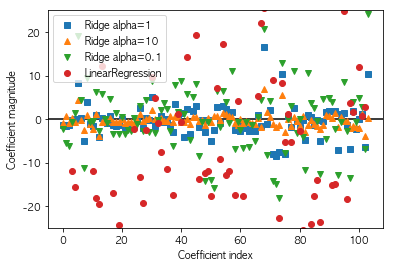

In [63]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

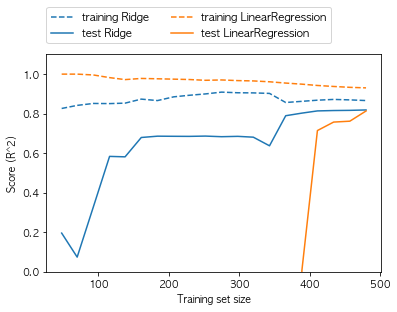

In [64]:
# learning curve : 학습 곡선
# alpha를 고정하고 훈련 데이터의 크기를 변화시켜 실험

mglearn.plots.plot_ridge_n_samples()

- train 데이터 셋에서는 linear Regression이 더 나으나, test 데이터 셋에서는 Ridge가 더 잘됨
- 데이터 셋 크기 400 미만에서는 선형 회귀는 어떤 것도 학습하지 못함
  - 단 데이터 셋이 늘어나면서 따라잠음

#### Lasso

- Ridge와 마찬가지로 계수를 0에 가깝게 만들려고 함
- 방식은 다름
- L1 Regularization이라고 말함
- 사용하게 되면 어떤 경우에는 계수 값이 0이 될 수도 있다. 즉, 완전히 제외되는 특성이 생길 수 있다.
  - 의도치 않게 feature selection이 자동으로 되는 효과
  
**수식 설명**
- weight vector의 L1 norm을 사용
  - 다른 말로 하면 계수의 절댓값의 합
  - alpha를 크게 하면 패널티의 효과가 커지고(가중치 감소), 작게 하면 반대가 된다.

$$
\alpha \sum _{ j=1 }^{ m }{ { \left| { w }_{ j } \right|  } } 
$$

In [65]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [67]:
# feature : 4개 만 사용

print(lasso.coef_)

[-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -5.3529079  -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.         -1.05063037 -3.3104274  -0.         -0.          0.
 -0.         -0.         -0.          0.         -0.         -0.41386744
 -0.         -0. 

- Lasso도 alpha로 조절 할 수 있다.
- underfitting을 줄이기 위해 alpha를 줄임
  - 이렇게 하려면 max_iter9반복 실행하는 최대 횟수)의 기본값을 늘려야 함

In [68]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [69]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


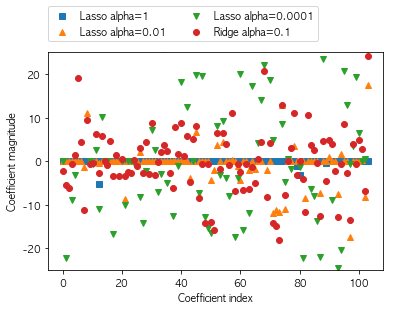

In [70]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()

#### 무엇을 사용해야 할까?
- 실제로는 리지를 선호
- 상황에 맞게 쓰는 게 정답
- elasticnet도 있다
  - 리지와 라소의 패널티를 결합한 모델

#### 분류용 선형 모델

선형 모델은 분류에도 널리 사용


**binary classification**
$$
\hat { y } =w[0]\quad +\quad x[0]\quad +\quad w[1]\quad \times \quad x[1]\quad +\quad \cdot \cdot \cdot \quad +\quad w[p]\quad \times x[p]\quad +\quad b\quad >\quad 0
$$

선형 회귀와 비슷
- 다른 건 특성들의 가중치 합을 그냥 사용하는 대신 예측한 값을 임계치 0 과 비교
  - 0보다 작으면 클래스를 -1로 예측
  - 0보다 크면 클래스를 +1로 예측
  
분류용 선형 모델에서는 **decision boundary(결정 경계)**가 입력의 선형 함수
- 선형 분류기는 선, 평면, hyperplane을 사용해서 두 개의 클래스를 구분하는 분류기
- 알고리즘 다양, 구별 방법은 다음과 같다.
  - 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
  - 사용할 수 있는 regularization이 있다면 어떤 방식인지
  

가장 널리 알려진 선형 분류 알고리즘은
- LogisticRegression : 로지스틱 회귀
- SVM : 서포트 벡터 머신

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


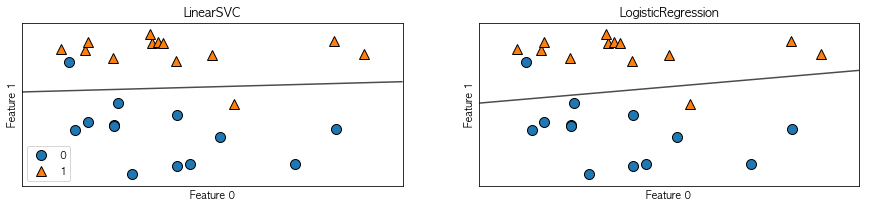

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(15, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

해석
- 경계를 기준으로 새로운 데이터가  직선 위쪽에 놓이면 클래스 1, 반대에 놓이면 클래스 0으로 분류
- 위의 그림 기준, 두 개의 그래프가 1개를 잘못 분류함
- L2 사용함
- regularization을 결정하는 건 parameter C임
  - 기본값 1.0
  - C가 높으면 Regularization 감소, train에 가능한 맞추려고 함
  - 반대일 경우 일반화

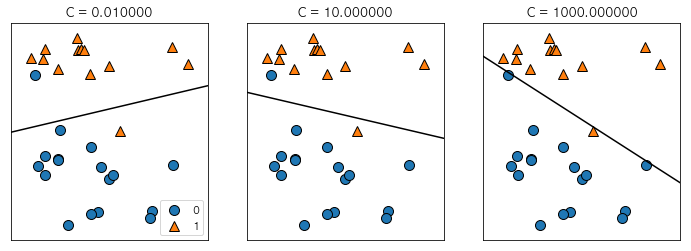

In [72]:
mglearn.plots.plot_linear_svc_regularization()


In [73]:
# parameter C=1
# train and test 성능이 매우 비슷하므로, underfitting으로 추정

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [74]:
# parameter C=100

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [75]:
# parameter C=0.01
# C=1일 때 underfitting이었는데, 그거보다 더 떨어짐

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


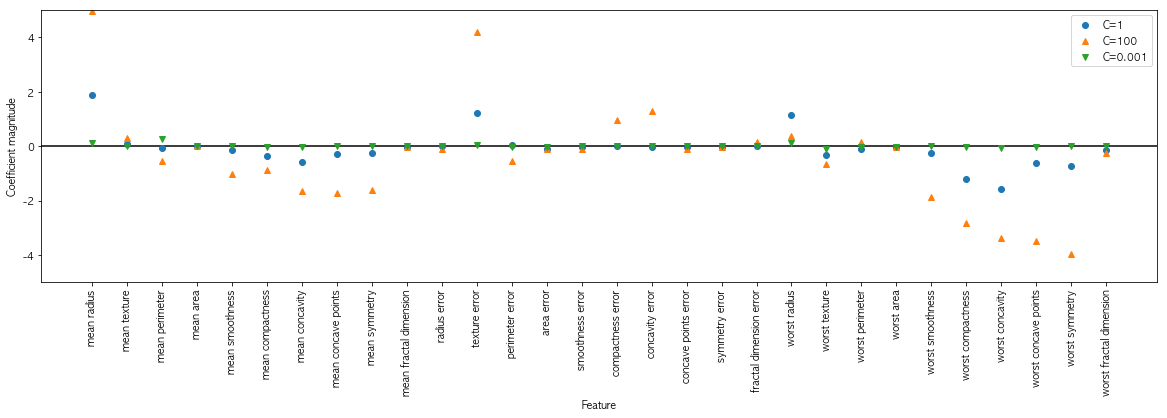

In [78]:
# comparing C parameter

plt.figure(figsize=(20, 5))

plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


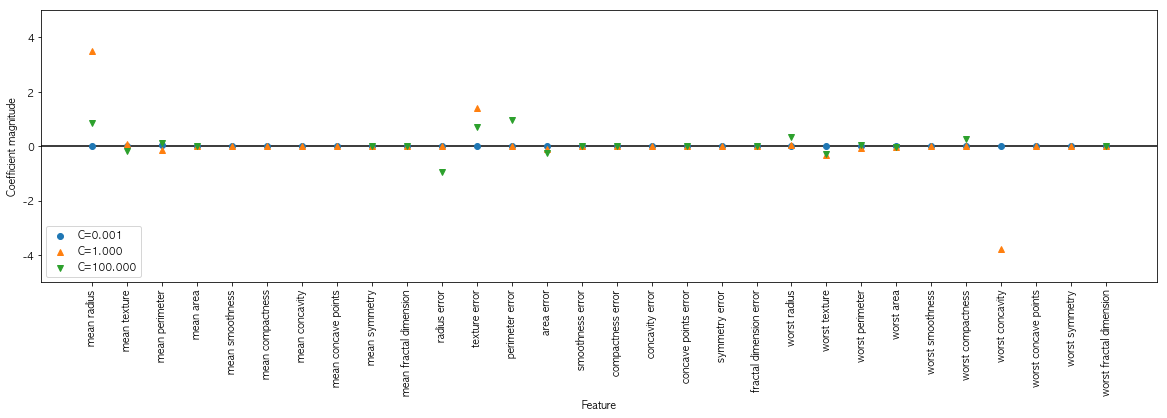

In [83]:
# apply L1 regularization using penalty parameter

plt.figure(figsize=(20, 5))
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

-----------

#### 다중 클래스 분류용 선형 모델

- LogisticRegression을 제외하고 linear 모델을 binary classification만 지원
  - LogisticRegression을sms softmax function을 사용해 multi classification 가능
- binary classification을 multi classification으로 확장하는 보편적인 기법은 one-vs-all 방법
  - one-vs-all?
  - 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습, 결국 클래스의 수만큼 이진 분류 모델일 만들어짐
  - 예측을 할 때 이렇게 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택
  - 만들고 나면 각 클래스가 w와 b를 하나씩 갖게 되고, 결과 중 가장 높은 클래스가 label이 결정됨

-- TODO : 수식 적어서 정리 하기

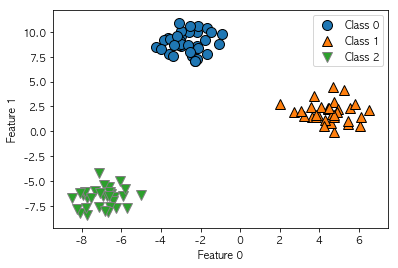

In [84]:
# example, 2-D dataset, Gaussian distribution data

from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.show()

In [86]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


In [87]:
linear_svm.coef_

array([[-0.17491936,  0.23140472],
       [ 0.47621514, -0.06936546],
       [-0.18914488, -0.20399784]])

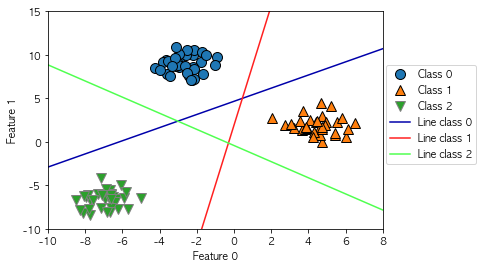

In [88]:
# 세 개의 이진 분류기로 경계 시각화

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

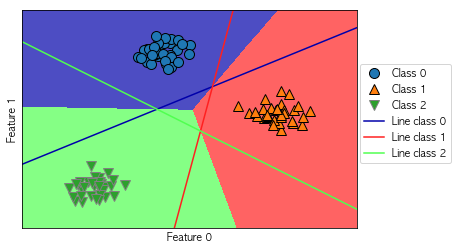

In [89]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### 장단점과 매개변수

회귀 모델에서는 C와 Alpha를 조정하는 것이 중요
- log scale로 최적치를 정함
  - 0.01, 0.1, 1, 10 등

L1, L2 중 어떤 것을 사용해야 할지 고민
- 특성이 많지 않다면 L1을, 그렇지 않을 경우 L2를 사용하는 것이 낫다.
- L1이 모델의 해석의 중요한 요소일 때도 사용할 수 있다.
  - 몇 가지만으로도 모델의 중요 특성이 무엇이고, 효과가 어느 정도인지 설명하기가 쉽다.

선형 모델을 학습 속도가 빠르고, 예측도 빠름
- 매우 큰 데이터셋과 희소한 데이터셋에서도 잘 작동
  - 수십만~수백만의 샘플의 대용량 데이터셋의 경우 기본 설정을 빨리 처리하도록 아래와 같이 설정
  - LogisticRegression, Ridge의 solver='sag' 옵션 설정
    - sag는 Stochastic Average Gradient Descent의 약자로 반복이 진행될 때 이전에 구한 모든 경사의 평균을 사용하여 계수를 갱신
  - 또는, 선형 모델의 대용량 처리 버전으로 구현된 SGDClassifier, SGDRegressor를 사용
    - SGD는 Stochastic Gradient Descent(확률적 경사 하강법)의 약자
- 회귀와 분류에서 본 공식을 사용해 예측이 어떻게 만들어지는지 비교적 쉽게 이해 가능
  - 물로 안 되는 경우도 있음
- 선형 모델을 샘플에 비해 특성이 많을 때 잘 작동
- 다른 모델로 학습하기 어려운 매우 큰 데이터셋에도 선형 모델 많이 사용


그러나 저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 낫다.